# Bank Marketing - Subscription Prediction

### Marketing
The action or business of promoting and selling products or services, including market research and advertising.

### Term deposit
Term Deposits are one of the best investment options for people who are looking for a stable and safe return on their investments. In Term Deposits, the sum of money is kept for a fixed maturity and the depositor is not allowed to withdraw this sum till the end of the maturity period. That is why they are called as Term Deposits because they are kept up to a particular term.

## Data Set information

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The dataset bank-additional-full.csv contains all examples (45211) with 17 features, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
### Attribute information
#### Input Variables
##### Bank Client Data
**age:** (numeric)  
**job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
**marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
**education:** (categorical: primary, secondary, tertiary and unknown)  
**default:** has credit in default? (categorical: 'no','yes')  
**balance:** average yearly balance, in euros (numeric)   
**housing:** has housing loan? (categorical: 'no','yes')  
**loan:** has personal loan? (categorical: 'no','yes')  
##### Related with the last contact of the current campaign:
**contact:** contact communication type (categorical: 'cellular','telephone')  
**day:** last contact day of the month (numeric)  
**month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
**duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
##### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)  
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)  
**previous:** number of contacts performed before this campaign and for this client (numeric)  
**poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

#### Output variable (desired target):
**y:** has the client subscribed a term deposit? (binary: 'yes','no')

**Note:** It is mentioned in the Data Set information that thee are no missing values, but still we will run some test forr the same.

## Data Exploration
### import pandas and numpy for Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 

df = pd.read_csv('./bank/bank-full.csv')
print('Total samples: ', len(df))

Total samples:  45211


### Missing Data

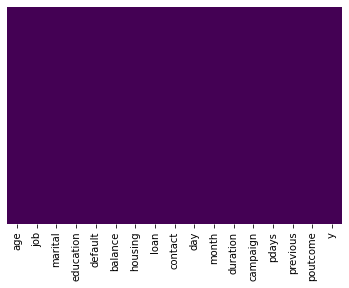

In [2]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values.

### Overview of available data

In [4]:
df.describe()
# df[df['pdays'] != -1].count()
# df[df['previous'] != 0].count()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Quick Observations on Numerical Data
- Total available data count is 45211 entries  
- Mean Age of the contacted customers is 41 years (Approx)  
- Mininmum Age of the contacted customers is 18 years
- Maximum Age of the contacted customers is 95 years
- Mean of call durationss is 258 seconds  
- Mean account balance for the customers 1362 euros  
- More than 75% of the the values in the column 'pdays' are set to -1. We know from our attribute informations that -1 means client was not previously contacted
- Just similar to the last observation more than 75% of the values inside the columns 'previous' which indicates how many times the customer was contacted before this campaign is 0 i. e. the customer is being contactedd forr the very first time.
- The values '-1' and '0' of the columns 'pdays' and 'previous' respectively are actually pointing towards the same fact.
- Because of the significant redundency of '0' and '-1' in their respective columns We might drop them later if their fluctuations do not show any relation with the outcome i. e. column 'y'.

In [5]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


#### Quick Observation on Categorical Data
- Out of 45211, more than 44000 i. e. 97.3% customers do not have a credit. The number of customers with credit are negligible when compared to it. We might drop this column later.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
df.shape

(45211, 17)

In [10]:
df.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

**Quick Observation** 
- 5289 Out of 45211 contacted customers subscribed

In [11]:
# Adding a new column by name 'subscribed' to store the value '1' if subscribed, else '0' 
subscribed = len(df[df.y == 'yes'])

In [12]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
# By calculating the prevalance we are checking that out of total customers how many customer have actually suscribed 
def calculate_prevalance(subscribed):
    total_customers = len(df)
    positive_prevalance = subscribed/total_customers
    positive_prevalance = round(positive_prevalance, 3)
    print(f"The positive prevalnce is: {positive_prevalance}")
    
calculate_prevalance(subscribed)

The positive prevalnce is: 0.117


### Exploring unique values

- Checking if there are any unnecessary columns
- Finding categorical varieties

In [14]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,balance,housing,loan,contact,day
0,58,management,married,tertiary,no,2143,yes,no,unknown,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5


In [15]:
df[list(df.columns)[10:]].head()

,month,duration,campaign,pdays,previous,poutcome,y
0,may,261,1,-1,0,unknown,no
1,may,151,1,-1,0,unknown,no
2,may,76,1,-1,0,unknown,no
3,may,92,1,-1,0,unknown,no
4,may,198,1,-1,0,unknown,no


In [16]:
df.shape

(45211, 17)

In [17]:
# check unique values for every column
for feature in df.columns:
    
    # get a list of unique values
    unique_values = df[feature].unique()
    print(f'{feature} : {len(unique_values)} unique values')

age : 77 unique values
job : 12 unique values
marital : 3 unique values
education : 4 unique values
default : 2 unique values
balance : 7168 unique values
housing : 2 unique values
loan : 2 unique values
contact : 3 unique values
day : 31 unique values
month : 12 unique values
duration : 1573 unique values
campaign : 48 unique values
pdays : 559 unique values
previous : 41 unique values
poutcome : 4 unique values
y : 2 unique values


In [18]:
# for every column
check_value_occerrence = []
for feature in df.columns:
    
    # get a list of unique values
    unique_values = df[feature].unique()
    number_of_unique_values = len(unique_values)
    if number_of_unique_values < 30:
        print(f'{feature} : {number_of_unique_values}\n{unique_values}')
        check_value_occerrence.append(feature)

job : 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : 3
['married' 'single' 'divorced']
education : 4
['tertiary' 'secondary' 'unknown' 'primary']
default : 2
['no' 'yes']
housing : 2
['yes' 'no']
loan : 2
['no' 'yes']
contact : 3
['unknown' 'cellular' 'telephone']
month : 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : 4
['unknown' 'failure' 'other' 'success']
y : 2
['no' 'yes']


### Numerical Features

In [19]:
numerical_data = [data for data in df.dtypes[df.dtypes == 'int64'].index]
numerical_data

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [20]:
df[numerical_data].isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [21]:
df[numerical_data].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


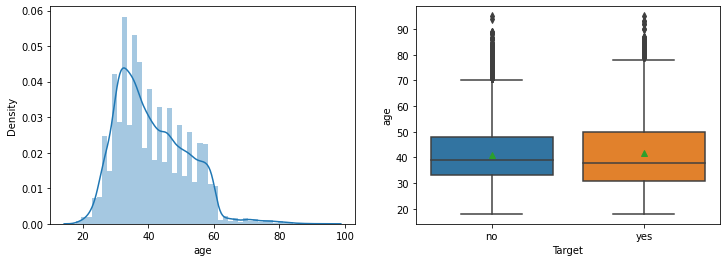

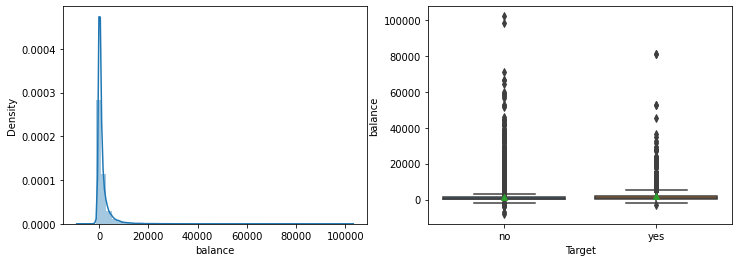

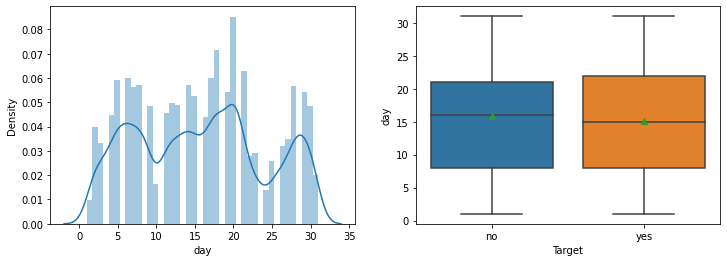

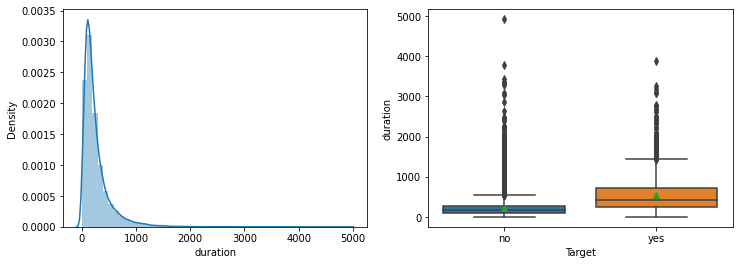

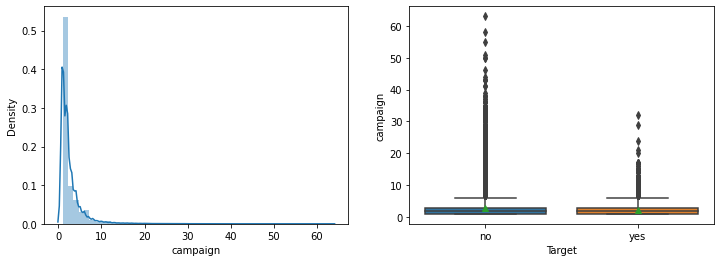

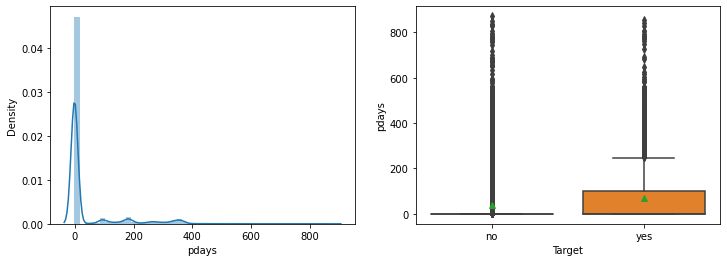

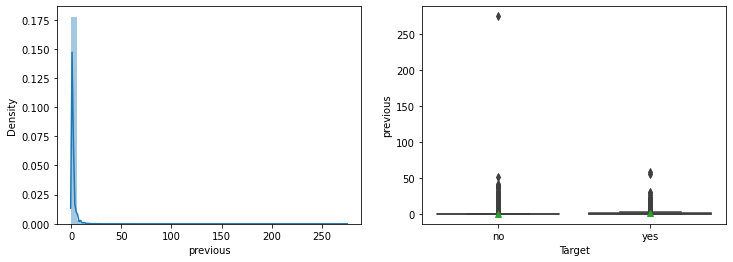

In [22]:
#creating distribution and box plots
for col in numerical_data : 
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='y', y = col, data =df, showmeans = True)
    plt.xlabel('Target')
    plt.ylabel(col)
    
    plt.show()

**Observation:** 
- From the Density and boxplot shown above we can say that the customerrs with longer call durations are more likely to subscribe for the term deposit
- Most of the customers who actually subscribed were contacted for the very first time
- Except for the column of age and days, all the other numerical features seems to be left skewed.

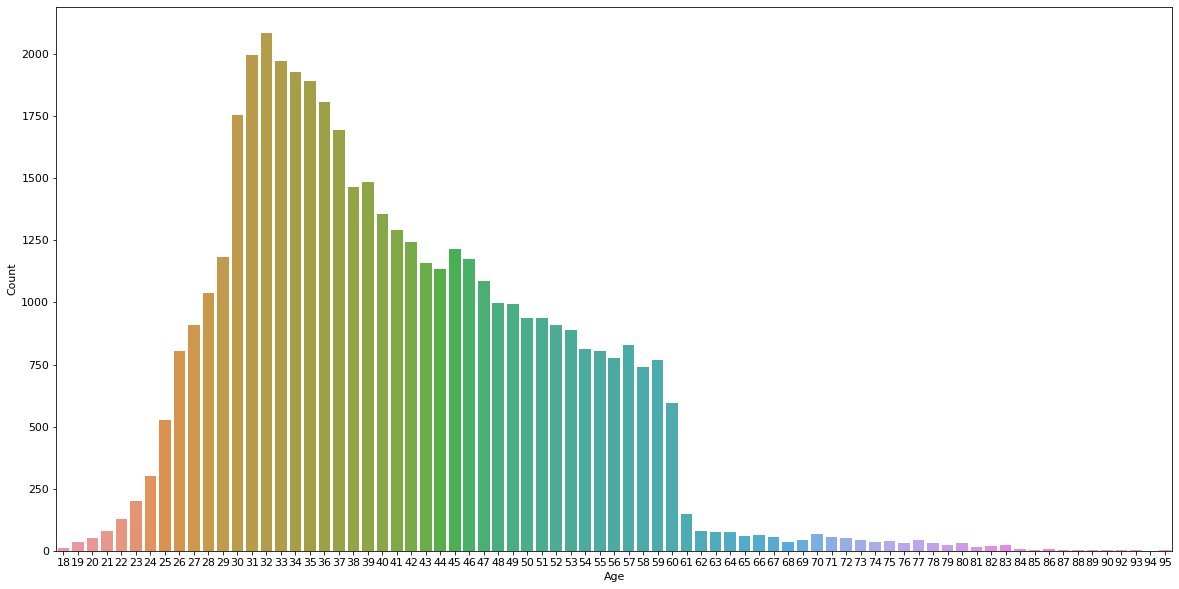

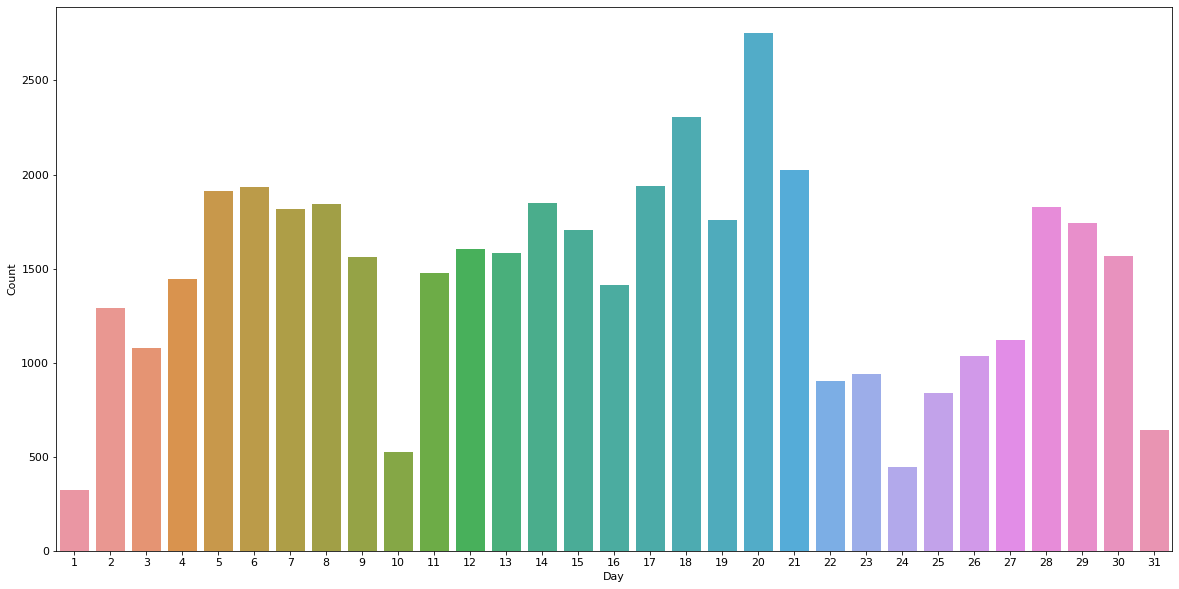

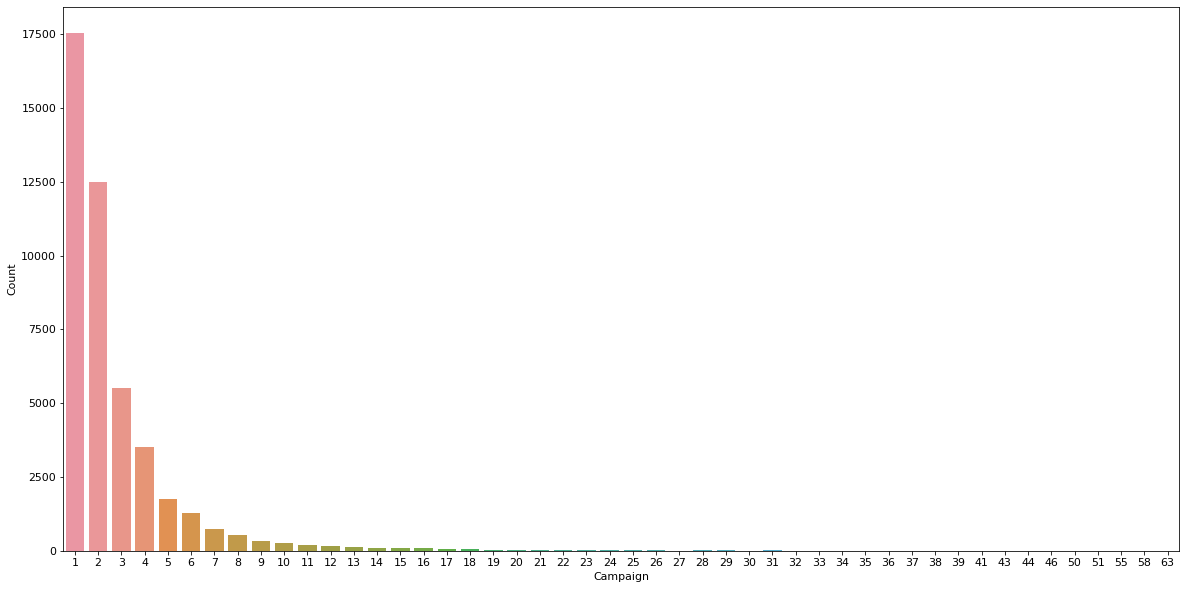

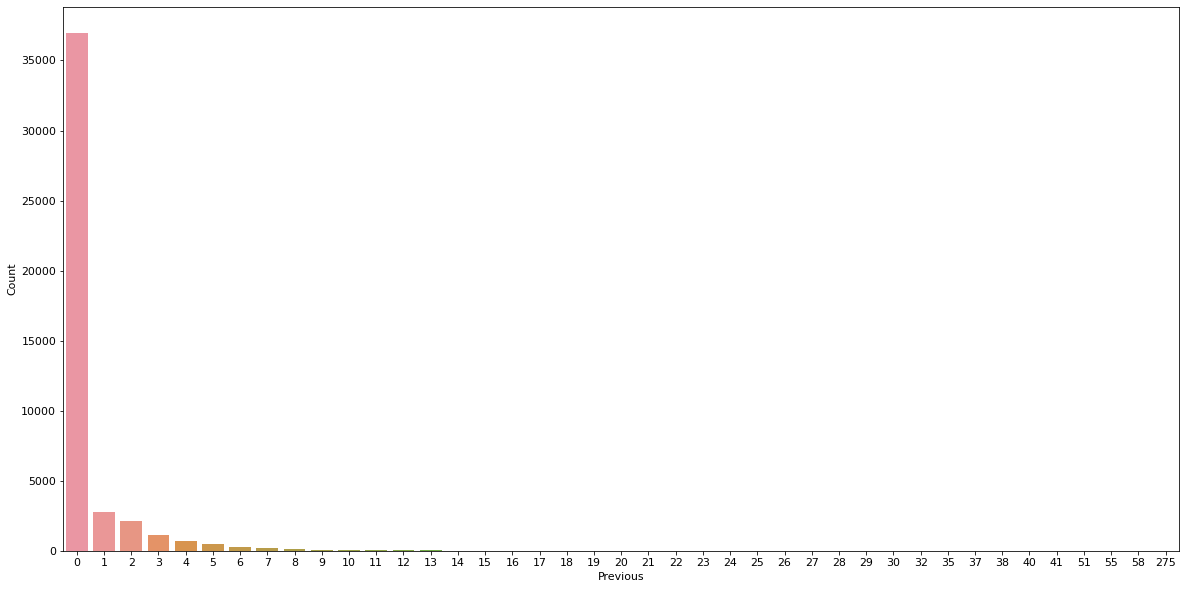

In [23]:
plt.rcParams.update({'font.size': 11})
for col in numerical_data : 
    if col not in ['balance', 'duration', 'pdays']:
        plt.figure(figsize=(20,10))
        plt.subplot().patch.set_visible(False)
        sns.countplot(x = df[col], data = df)
        plt.xlabel(col.title())
        plt.ylabel('Count')

        plt.show()

Balance, duration, pdays can be stored in bins

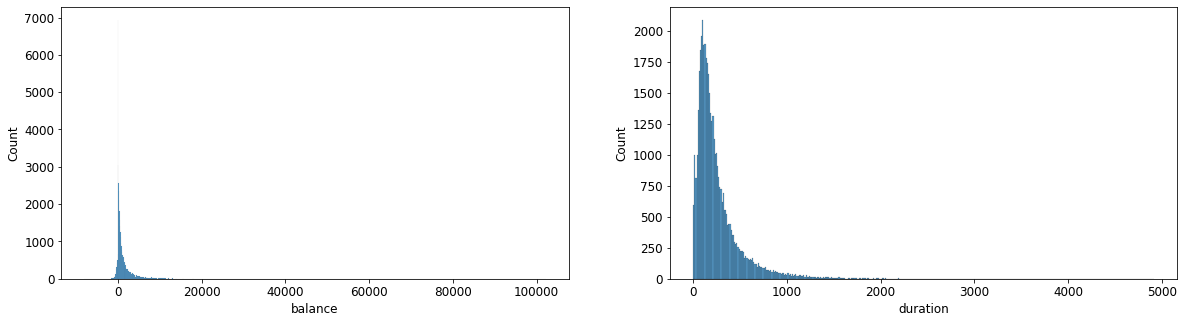

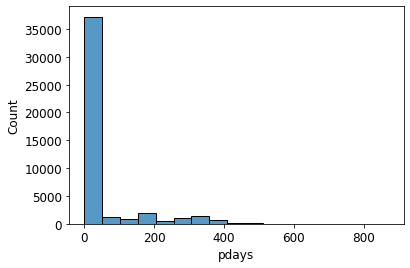

In [24]:
plt.subplots(figsize=(20,5)) 
plt.rcParams.update({'font.size': 12})
    
plt.subplot(1, 2, 1)
sns.histplot(x = df['balance'], data = df)
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(x = df['duration'], data = df)
plt.ylabel('Count')
plt.show()

plt.subplot()
sns.histplot(x = df['pdays'], data = df)
plt.ylabel('Count')

plt.show()

**Observations**
- The maximum targeted age group is 30 to 37 Years old with more than 2000 people of age 32
- More than 2500 people were contacted on 20th day of the month
- more than 17500 customers were contacted only once during the campaign

## Categorical Features

Categorical variables are non-numeric data such as job and education. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

In [25]:
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

### Graphical Representation of Categorical Features

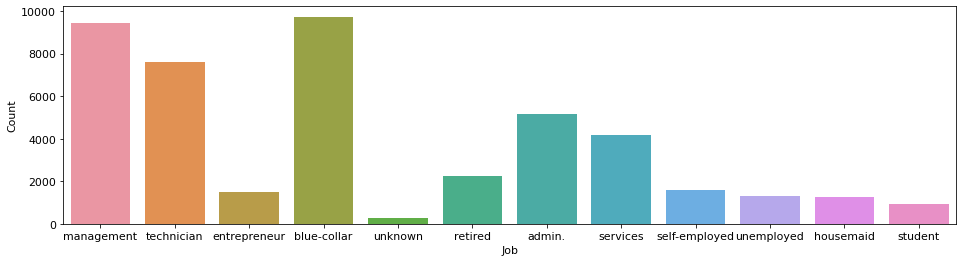

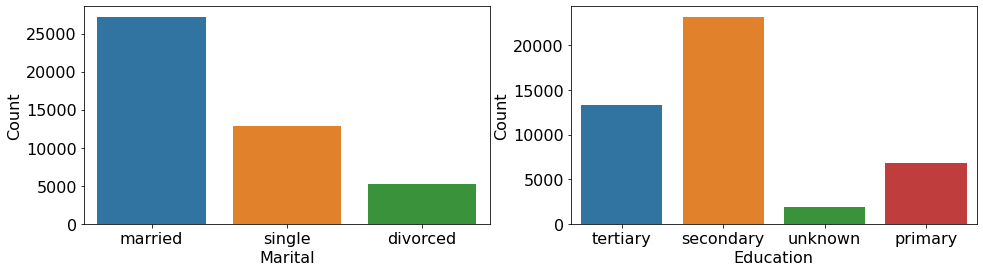

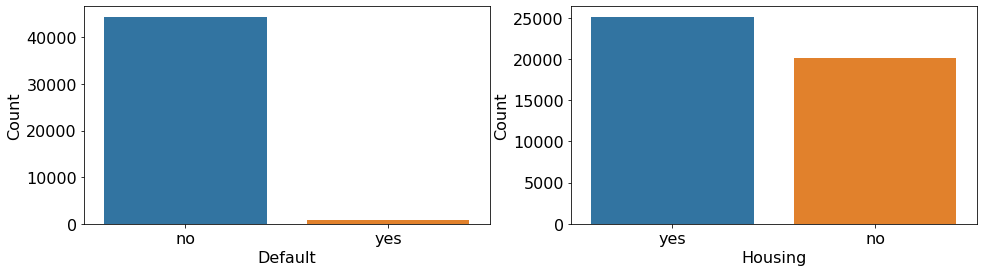

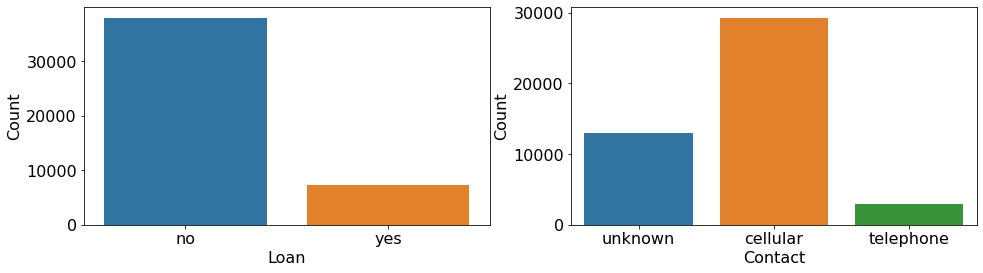

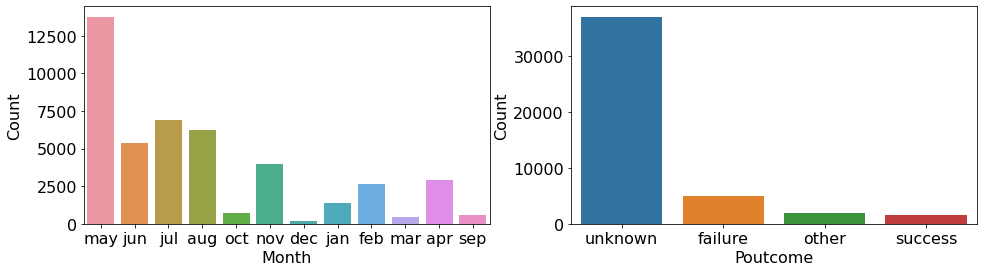

In [26]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(16,4))
plt.subplot().patch.set_visible(False)
sns.countplot(x = df['job'], data = df)
plt.xlabel('Job')
plt.ylabel('Count')

plt.rcParams.update({'font.size': 16})

for col in range(1, len(object_data) - 1, 2): 
    plt.figure(figsize=(16,4))
    col_index = col
    column_name = object_data[col_index]
    col_index += 1
    plt.subplot(1, 2, 1).patch.set_visible(False)
    sns.countplot(x = df[column_name], data = df)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
                 
    plt.subplot(1, 2, 2)
    column_name = object_data[col_index]
    sns.countplot(x = df[column_name], data = df)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
    
    plt.show()

**Observations**
- We can see the most of the targeted customers are either in management or are blue-coller (9000+ each)
- More than 25000 of the customers are married
- 20000+ customers have received secondary education
- 40000+ customers do not have any credit
- Around 25000+ have taken a housing loan
- 35000+ People do not have any kind of personal loan
- Around 30000+ people were contacted over cellular phones
- Most of the customers were contacted in the month of May
- Most of the people are being contacted for the very first time hence most of the values in the column poutcomee are unknown
- 5289 Out of 45211 contacted customers subscribed

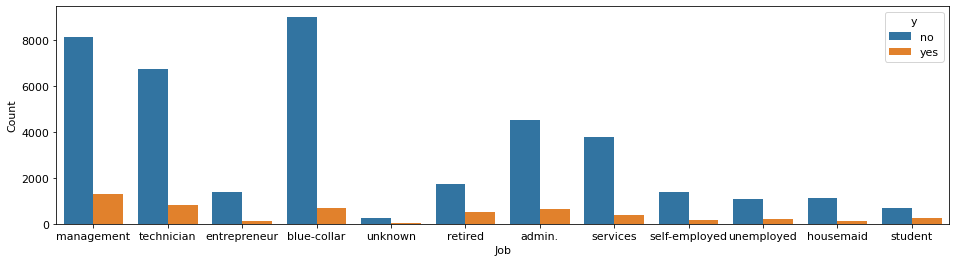

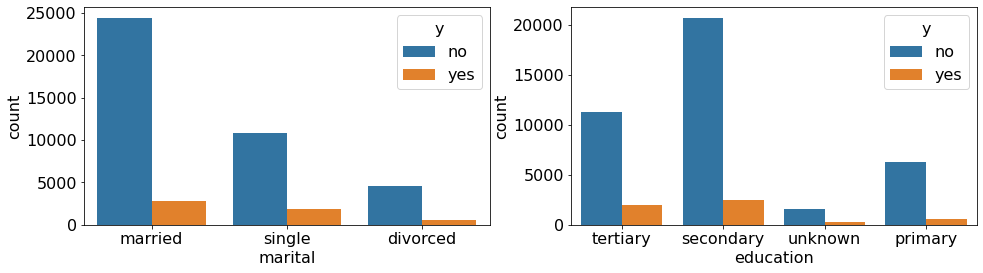

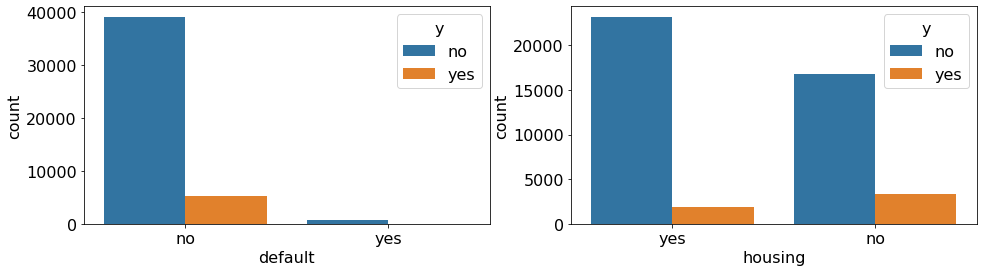

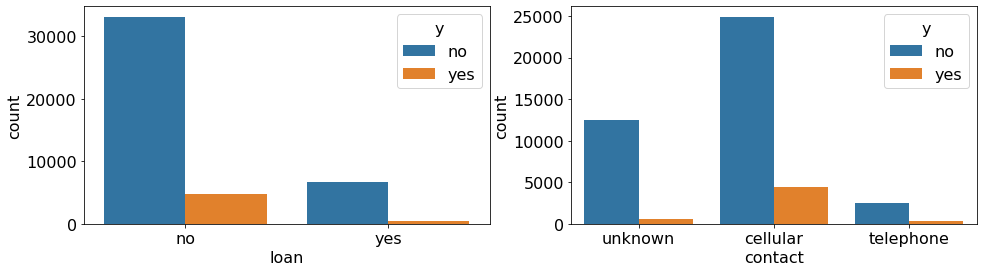

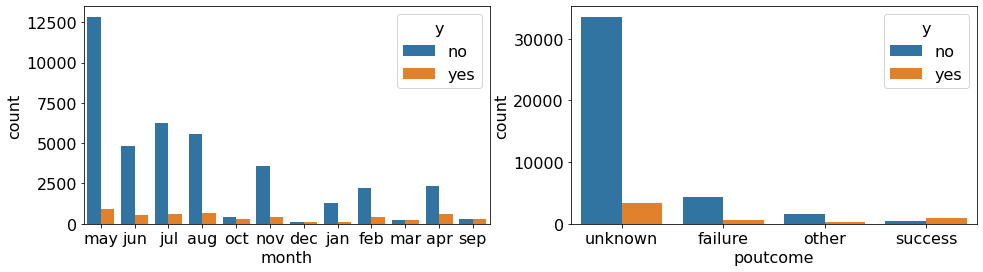

In [27]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(16,4))
plt.subplot().patch.set_visible(False)
sns.countplot(x = df['job'], hue='y', data = df)
plt.xlabel('Job')
plt.ylabel('Count')

plt.rcParams.update({'font.size': 16})

plt.show()

for col in range(1, len(object_data) - 1, 2): 
    plt.figure(figsize=(16,4))
    col_index = col
    column_name = object_data[col_index]
    col_index += 1
    plt.subplot(1, 2, 1).patch.set_visible(False)
    sns.countplot(x=df[column_name],hue='y',data=df)
    
    column_name = object_data[col_index]
    plt.subplot(1, 2, 2).patch.set_visible(False)
    sns.countplot(x=df[column_name],hue='y',data=df)
    
    plt.show()

In [28]:
for col in object_data:
    print(df.groupby(['y', col]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

**Obeservations**
- The customerrs in job category 'retired' have shown higher interest in the term deposit as compared to the others.
- Customers with a tertiary level of education were more like to subscribe for the term deposit.
- The people who do not have a credit have shown interest in the term deposit.
- The people who do not have a housing loan have shown relatively higher interest in the term deposit.
- Customers who were contacted during the month of March, September, December, and October repectively have mostly subscribed to the term deposit.

In [29]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [30]:
# plt.subplots(figsize=(10,10)) 
# sns.heatmap(df.corr(), cbar=True, cmap="RdBu_r")
# plt.title("Correlation Matrix", fontsize=8)
# plt.show()

In [31]:
# frequency of particular value in a columns where 
for column in check_value_occerrence:
    print(f'{df.groupby(column).size()}\n')

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

marital
divorced     5207
married     27214
single      12790
dtype: int64

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

default
no     44396
yes      815
dtype: int64

housing
no     20081
yes    25130
dtype: int64

loan
no     37967
yes     7244
dtype: int64

contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
dtype: int64

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64

y
no     39922
yes     5289
dtype: int64



## Feature Engineering

Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data.Here, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical and categorical features.

In [32]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [33]:
# Check for missing values
df[object_data].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

In [34]:
encoded_df = df.copy()

In [35]:
for col in object_data:
    encoded_df[col] = df[col].astype('category')
    encoded_df[col+"_encoded"] = encoded_df[col].cat.codes
encoded_df.dtypes

age                     int64
job                  category
marital              category
education            category
default              category
balance                 int64
housing              category
loan                 category
contact              category
day                     int64
month                category
duration                int64
campaign                int64
pdays                   int64
previous                int64
poutcome             category
y                    category
job_encoded              int8
marital_encoded          int8
education_encoded        int8
default_encoded          int8
housing_encoded          int8
loan_encoded             int8
contact_encoded          int8
month_encoded            int8
poutcome_encoded         int8
y_encoded                int8
dtype: object

In [36]:
encoded_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,poutcome_encoded,y_encoded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,4,1,2,0,1,0,2,8,3,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,9,2,1,0,1,0,2,8,3,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,2,1,1,0,1,1,2,8,3,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,1,3,0,1,0,2,8,3,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,9,1,2,0,0,0,0,9,3,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,5,0,0,0,0,0,0,9,3,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,5,1,1,0,0,0,0,9,2,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,1,1,1,0,0,0,1,9,3,0


In [37]:
encoded_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_encoded', 'marital_encoded',
       'education_encoded', 'default_encoded', 'housing_encoded',
       'loan_encoded', 'contact_encoded', 'month_encoded', 'poutcome_encoded',
       'y_encoded'],
      dtype='object')

In [38]:
encoded_df.drop(object_data, axis=1, inplace=True)
encoded_df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_encoded', 'marital_encoded', 'education_encoded',
       'default_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded',
       'month_encoded', 'poutcome_encoded', 'y_encoded'],
      dtype='object')

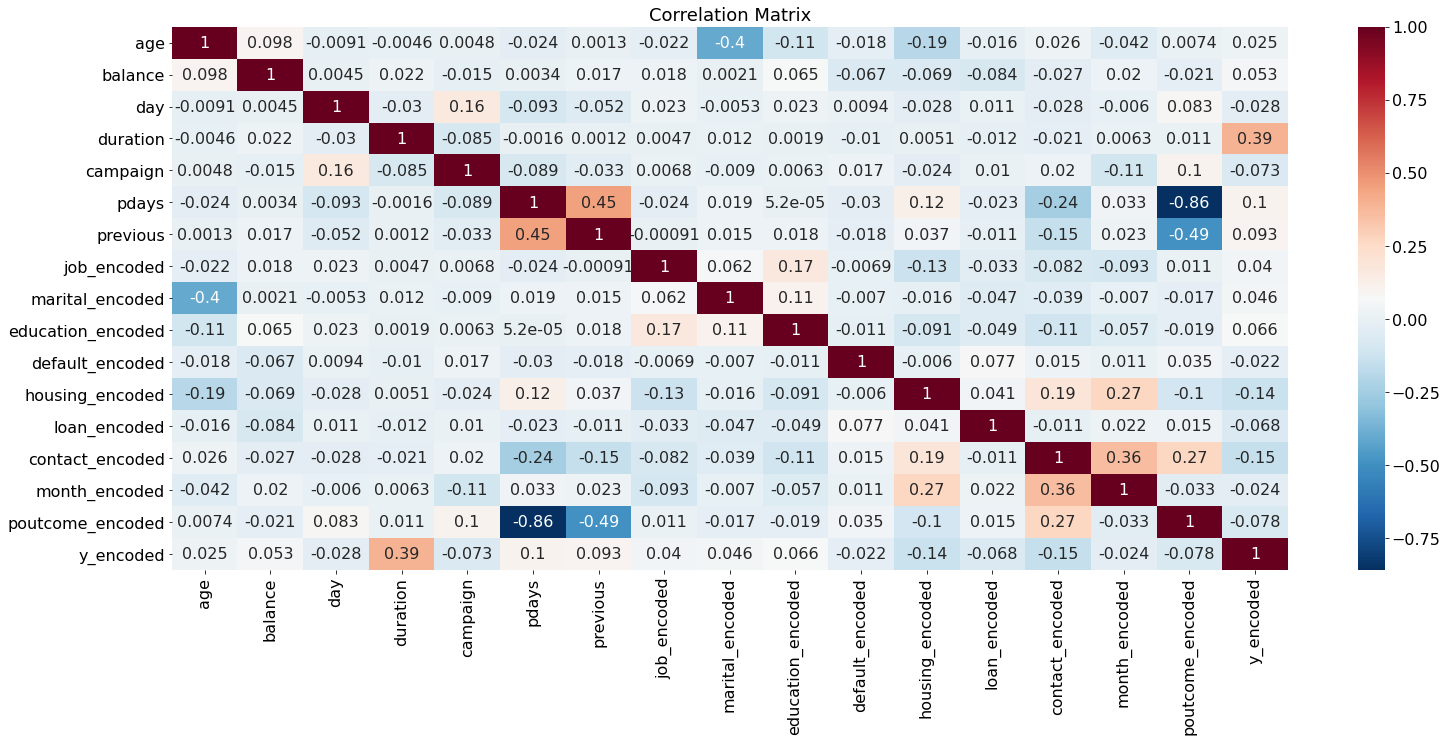

In [39]:
plt.subplots(figsize=(25,10)) 
sns.heatmap(encoded_df.corr(), cbar=True, cmap="RdBu_r", annot=True)
plt.title("Correlation Matrix", fontsize=18)
plt.show()

In [40]:
#defaut feature does not play imp role
print(encoded_df.groupby(['default_encoded']).size())
print(encoded_df.groupby(['y_encoded','default_encoded']).size())

default_encoded
0    44396
1      815
dtype: int64
y_encoded  default_encoded
0          0                  39159
           1                    763
1          0                   5237
           1                     52
dtype: int64


In [41]:
print('10 most frequent values in the column "previous":')
print(encoded_df.groupby(['previous']).size()[:10])
print()
print("Data in previous column compared to the 'y':")
print(encoded_df.groupby(['y_encoded','previous']).size())

10 most frequent values in the column "previous":
previous
0    36954
1     2772
2     2106
3     1142
4      714
5      459
6      277
7      205
8      129
9       92
dtype: int64

Data in previous column compared to the 'y':
y_encoded  previous
0          0           33570
           1            2189
           2            1650
           3             848
           4             543
                       ...  
1          26              1
           29              1
           30              1
           55              1
           58              1
Length: 66, dtype: int64


In [42]:
print(encoded_df.groupby(['pdays']).size())
print(encoded_df.groupby(['y_encoded','pdays']).size())

pdays
-1      36954
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Length: 559, dtype: int64
y_encoded  pdays
0          -1       33570
            1           9
            2          35
            3           1
            4           1
                    ...  
1           804         1
            805         1
            828         1
            842         1
            854         1
Length: 914, dtype: int64


In [43]:
encoded_df.shape

(45211, 17)

In [44]:
#with one hot encoding
df_ohe = df.copy()
obj_data_ohe = pd.get_dummies(df_ohe[object_data],drop_first = False)
obj_data_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [45]:
obj_data_ohe.keys()

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')

In [46]:
df_ohe = pd.concat([df_ohe, obj_data_ohe], axis=1)

In [47]:
df_ohe.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', '

In [48]:
df_ohe.drop(object_data, axis=1, inplace=True)

In [49]:
df_ohe.keys()

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')

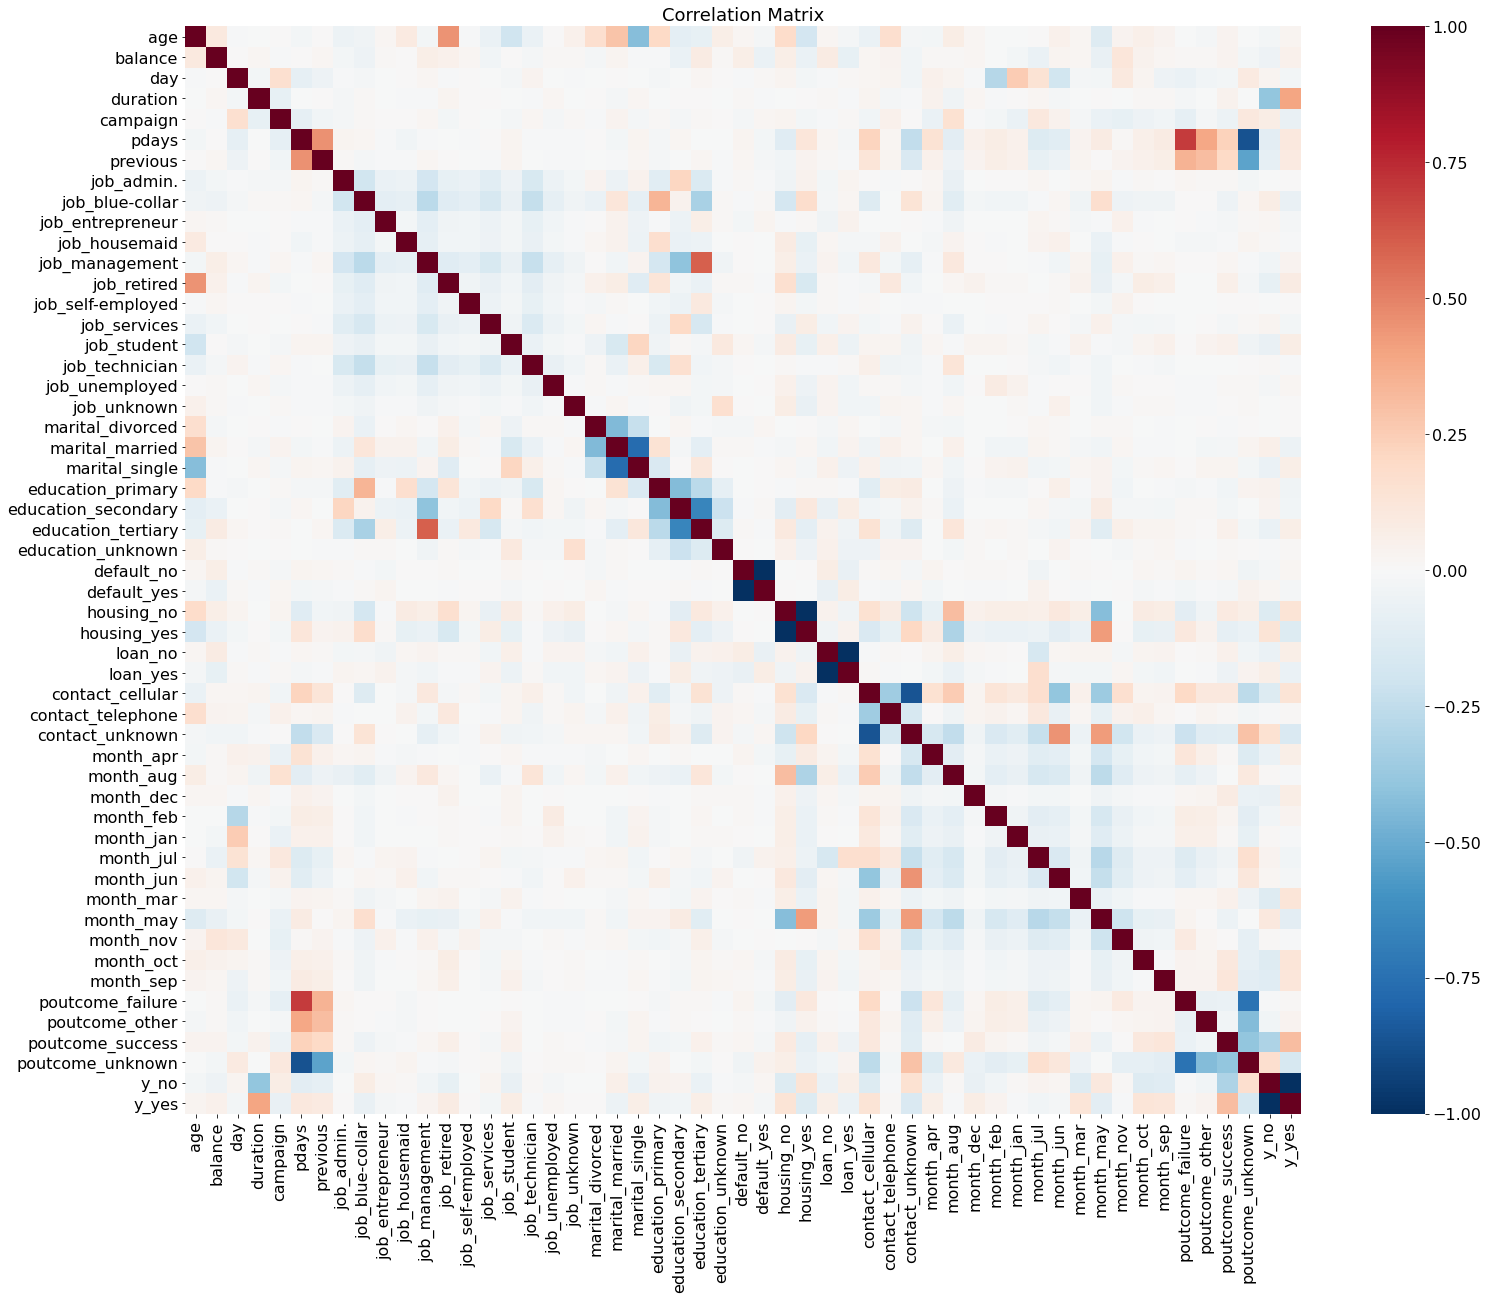

In [50]:
plt.subplots(figsize=(25,20)) 
sns.heatmap(df_ohe.corr(), cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=18)
plt.show()

In [51]:
df.shape

(45211, 17)

### Dropping non-related columns
- **default:** It has 44369 'no' values. It denotes that 44369 out of 45211 customers do not have a credit in default.
- **contact:** This column can't contribute anymore in our prediction as the standard meddium of communication is 'cellular' now.
- **month and day:** We can drop these two columns as they aren't showing any significant correlation with our target variable.
- **pdays and previous:** Most frequent values in these two columns are -1, and 0. both these values have a frequency of 36954 and are pointing towards the same  fact. We can drop both of them as they aren't showing any significant correlation with our target variable.
- **poutcome:** We will drop this column as it has 36959 'unknown' values, also it isn't showing any significant correlation with the target.

In [52]:
df.drop(['default', 'contact', 'month', 'day', 'pdays', 'previous', 'poutcome'], axis=1, inplace= True)

In [53]:
df.shape

(45211, 10)

In [54]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'y'],
      dtype='object')